<a href="https://colab.research.google.com/github/benigmatic/Machine-learning-and-Data-vizualization/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Load Data and perform basic EDA
import libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
# for machine learning
import sklearn
import missingno as msno

 import the data to a dataframe and show the count of rows and columns 

In [ ]:
df = pd.read_csv('hrdata3.csv')
df.shape

print("Columns: "+str(len(df.columns)))
print("Rows: "+str(len(df.index)))


Columns: 8
Rows: 12977


Show the top 5 and last 5 rows

In [ ]:
df.head(5)
df.tail(5)

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
12972,19149,251,0.920,9,2,1,36,1.0
12973,19150,32313,0.920,10,3,3,23,0.0
12974,19152,29754,0.920,7,1,1,25,0.0
12975,19155,24576,0.920,21,2,4,44,0.0
12976,19156,5756,0.802,0,4,2,97,0.0


Show missing values in the columns

In [ ]:
missingdf = df.isnull().sum().to_frame("null")
missingdf.sort_values("null", inplace = True, ascending = False)
for index, row in missingdf.iterrows():
    print(index, row[0])

Unnamed: 0 0
enrollee_id 0
city_development_index 0
experience 0
company_size 0
last_new_job 0
training_hours 0
target 0


Convert not numeric values to numeric (int/float) before going to the next step.

In [ ]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12977 entries, 0 to 12976
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              12977 non-null  int64  
 1   enrollee_id             12977 non-null  int64  
 2   city_development_index  12977 non-null  float64
 3   experience              12977 non-null  int64  
 4   company_size            12977 non-null  int64  
 5   last_new_job            12977 non-null  int64  
 6   training_hours          12977 non-null  int64  
 7   target                  12977 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 811.2 KB
None


plot the heatmap with correlations to get some more idea about the data.

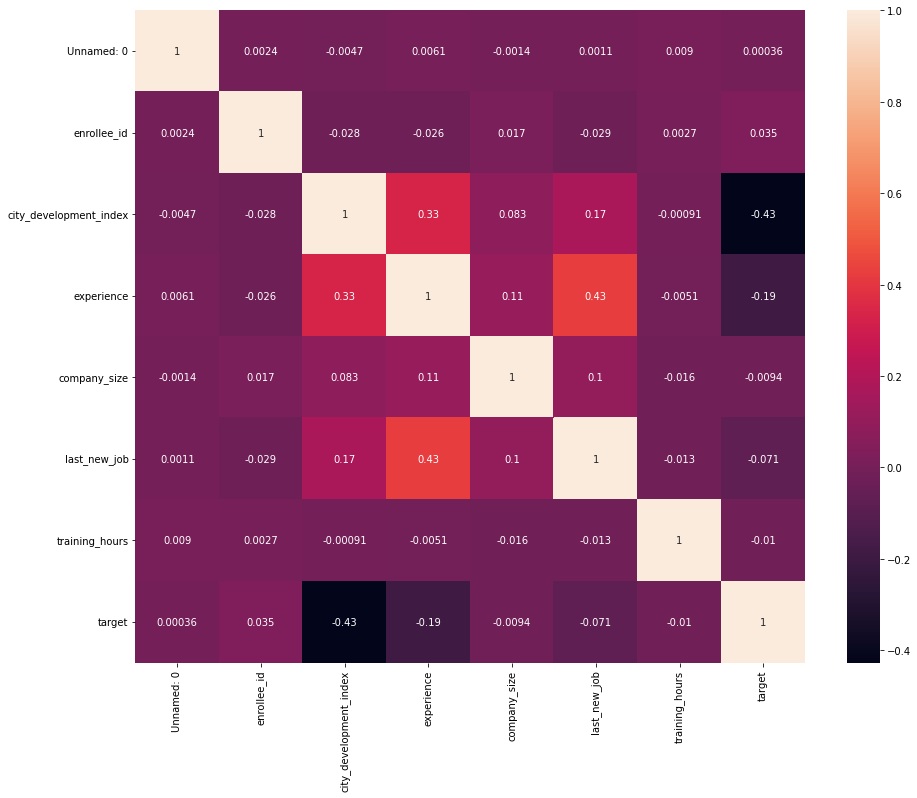

In [ ]:
correlation = df.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(correlation, annot=True)

### 2.  Feature Selection and Pre-processing 
Put all the data from the dataframe into X, except the enrolle_id and the target columns

In [ ]:
X = df.drop(columns = ["enrollee_id","target", "Unnamed: 0"], axis =1)
X.head(5)

,city_development_index,experience,company_size,last_new_job,training_hours
0,0.776,15,2,5,47
1,0.767,21,2,4,8
2,0.920,5,2,1,24
3,0.762,13,0,5,18
4,0.920,7,2,1,46


Perform feature scaling on the data of X with StandardScaler and show some sample data from X after scaling (Use the technique shown in the second answer from this post: 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled)

# for inverse transformation
X_inversed = scaler.inverse_transform(X_scaled)
print(X_inversed)

[[-0.50342203  0.63395707 -0.5747232   1.69076217 -0.30839586]
 [-0.57841303  1.54600905 -0.5747232   1.08113696 -0.95180478]
 [ 0.69643399 -0.88612956 -0.5747232  -0.74773864 -0.68784215]
 ...
 [ 0.69643399 -0.58211224 -1.0314958  -0.74773864 -0.67134448]
 [ 0.69643399  1.54600905 -0.5747232   1.08113696 -0.35788885]
 [-0.28678136 -1.64617288  0.338822   -0.13811344  0.51648738]]
[[ 0.776 15.     2.     5.    47.   ]
 [ 0.767 21.     2.     4.     8.   ]
 [ 0.92   5.     2.     1.    24.   ]
 ...
 [ 0.92   7.     1.     1.    25.   ]
 [ 0.92  21.     2.     4.    44.   ]
 [ 0.802  0.     4.     2.    97.   ]]


### 3. KMeans Clustering


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
kmeans = KMeans(n_clusters = 2, random_state = 47,init = "k-means++")
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=47)

Show the cluster centers as it is and then inverse the scale and show the centers.

In [ ]:
print(kmeans.cluster_centers_)
new = kmeans.fit(X_inversed)
print(new.cluster_centers_)
kmeans.fit(X_scaled)

[[-0.31364817 -0.63941844 -0.15207764 -0.55076921  0.01170319]
 [ 0.44177356  0.90062111  0.21420141  0.77575864 -0.01648395]]
[[  0.83639888  10.83377685   3.26905531   2.23474625  41.97690553]
 [  0.83649939  10.81099796   3.21181263   2.19144603 167.34052953]]


KMeans(n_clusters=2, random_state=47)

Show the distance matrix

In [ ]:
kmeans.transform(X_scaled)  #distance matrix

array([[2.6387601 , 1.58409296],
       [2.93535149, 1.74579189],
       [1.3371321 , 2.57904978],
       ...,
       [1.51732572, 2.56222519],
       [2.96221279, 1.14612076],
       [1.2962834 , 2.85511871]])

Show the labels

In [ ]:
print(kmeans.labels_)

[1 1 0 ... 0 1 0]


Add a new column to your data frame called cluster_label and assign the cluster label for the instances based on the K-means cluster label

In [ ]:
df['cluster_label'] = kmeans.labels_
df

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label
0,1,29725,0.776,15,2,5,47,0.0,1
1,4,666,0.767,21,2,4,8,0.0,1
2,6,28806,0.920,5,2,1,24,0.0,0
3,7,402,0.762,13,0,5,18,1.0,1
4,8,27107,0.920,7,2,1,46,1.0,0
...,...,...,...,...,...,...,...,...,...
12972,19149,251,0.920,9,2,1,36,1.0,0
12973,19150,32313,0.920,10,3,3,23,0.0,1
12974,19152,29754,0.920,7,1,1,25,0.0,0
12975,19155,24576,0.920,21,2,4,44,0.0,1


The target column of our data frame is floating-point numbers. So, this number is not comparable with the cluster label. Add a column target_int and write a function or use a strategy to store the int version of the target column into the target_int column (For example, 1.0 in the target will be 1 in the target_int, 0.0 will be 0)

In [ ]:
df['target_int'] = df['target'].astype(int)
display(df.dtypes)

Unnamed: 0                  int64
enrollee_id                 int64
city_development_index    float64
experience                  int64
company_size                int64
last_new_job                int64
training_hours              int64
target                    float64
cluster_label               int32
target_int                  int64
dtype: object

Show the top 5 rows of the dataframe now that shows you have added those two columns and they have the correct values

In [ ]:
df.head(5)

,Unnamed: 0,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_label,target_int
0,1,29725,0.776,15,2,5,47,0.0,1,0
1,4,666,0.767,21,2,4,8,0.0,1,0
2,6,28806,0.920,5,2,1,24,0.0,0,0
3,7,402,0.762,13,0,5,18,1.0,1,1
4,8,27107,0.920,7,2,1,46,1.0,0,1


Confusion matrix and classification report.

In [ ]:
print(confusion_matrix(df['target_int'], df['cluster_label']))
print(classification_report(df['target_int'], df['cluster_label']))
missclassified =  (df["target_int"] != df['cluster_label'])
matched, un_matched = df[df['target_int']==df['cluster_label']].shape[0],df[df['target_int']!=df['cluster_label']].shape[0]
print(un_matched)

[[5835 4860]
 [1747  535]]
              precision    recall  f1-score   support

           0       0.77      0.55      0.64     10695
           1       0.10      0.23      0.14      2282

    accuracy                           0.49     12977
   macro avg       0.43      0.39      0.39     12977
weighted avg       0.65      0.49      0.55     12977

6607


Show the inertia of the cluster

In [ ]:
kmeans.inertia_

49643.86379769514

Plot the inertia for the different numbers of clusters from 2 to 20. 

Text(0, 0.5, 'WCSS')

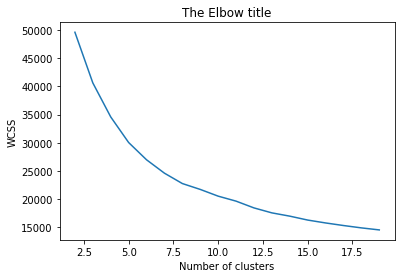

In [ ]:
wcss=[]
for i in range(2,20):
  kmeans = KMeans(i, init = "k-means++")
  kmeans.fit(X_scaled)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(2,20)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Show a scatter plot with training hours against experience where the points should be colored based on the two cluster labels. Write any thoughts on this plot

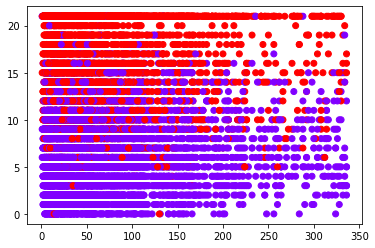

In [ ]:
plt.scatter(df['training_hours'],df['experience'],c=df['cluster_label'],cmap='rainbow')

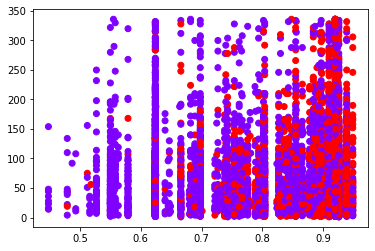

In [ ]:
plt.scatter(df['city_development_index'],df['training_hours'],c=df['cluster_label'],cmap='rainbow')

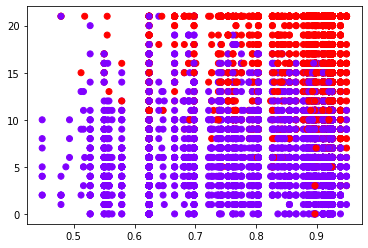

In [ ]:
plt.scatter(df['city_development_index'],df['experience'],c=df['cluster_label'],cmap='rainbow')

### 4. AgglomerativeClustering (Helping recourse for the relevant codes:  https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/ (Links to an external site.) )
1. Plot a dendrogram 

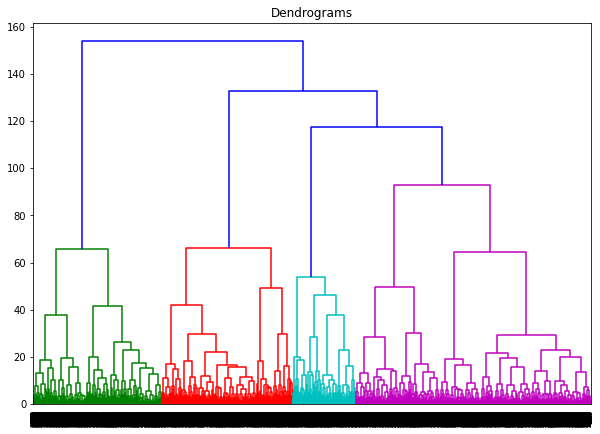

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

2.Perform AgglomerativeClustering with 2 clusters

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_scaled)

array([1, 1, 0, ..., 0, 1, 0])

Training hous vs experience

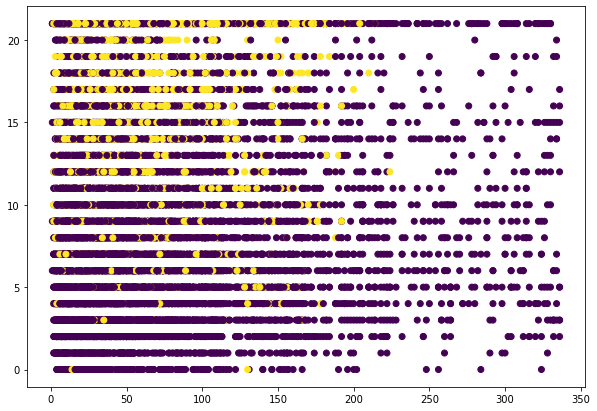

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['training_hours'], df['experience'], c=cluster.labels_) 

Different number of clusters

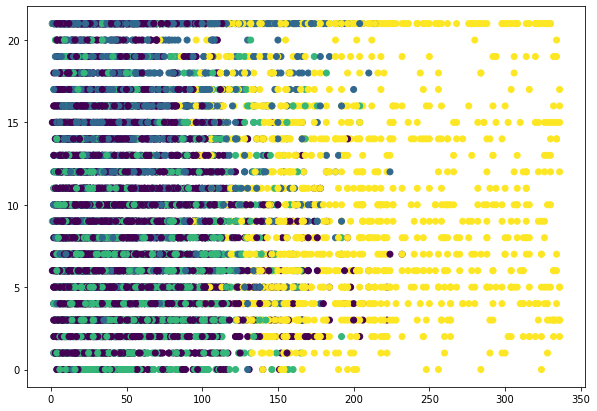

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_scaled)
plt.figure(figsize=(10, 7))  
plt.scatter(df['training_hours'], df['experience'], c=cluster.labels_) 